## Ice Cream Sales <br>
This is an analysis of the small fictional ice-cream shop in sunny Italy. <br>
You have next variables: <br>


---



---


product_id: Unique identifier for the product being sold. <br>
date: The specific date when sales data was recorded.<br>
sales_amount: The amount of sales or revenue generated on the given date.<br>
temperature: The recorded temperature on the date in Celcius.<br>
rainfall: The amount of rainfall.<br>
weather_condition: A description of the prevailing weather conditions on the so we have "sunny" and "not sunny". <br>







```
# Questo è formattato come codice
```

1. Import the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/IceCreamSales.csv')

2. Show the head and tail 10 values

In [ ]:
df.head(5)

,product_id,date,sales_amount,temperature,rainfall,weather_condition
0,2,2023-01-01,86.320006,10,7,not sunny
1,3,2023-01-02,194.868345,17,8,sunny
2,2,2023-01-03,196.927862,15,2,sunny
3,1,2023-01-04,69.325892,12,6,not sunny
4,1,2023-01-05,45.123280,6,0,not sunny


In [ ]:
df.columns

Index(['product_id', 'date', 'sales_amount', 'temperature', 'rainfall',
       'weather_condition'],
      dtype='object')

## Check for missing values

In [ ]:
df.isnull().sum()

product_id           0
date                 0
sales_amount         2
temperature          0
rainfall             0
weather_condition    0
dtype: int64

In [ ]:
null_index= df['sales_amount'].isnull()

In [ ]:
df[null_index]

,product_id,date,sales_amount,temperature,rainfall,weather_condition
19,1,2023-01-20,NaN,17,4,sunny
24,2,2023-01-25,NaN,6,6,not sunny


## Descriptive analysis

In [ ]:
df.describe()

,product_id,sales_amount,temperature,rainfall
count,83.000000,81.000000,83.00000,83.000000
mean,1.927711,95.184456,8.73494,5.144578
std,0.808237,51.995662,5.11355,3.112260
min,1.000000,40.858484,0.00000,0.000000
25%,1.000000,63.683101,5.00000,2.500000
50%,2.000000,78.053205,8.00000,6.000000
75%,3.000000,95.804563,13.00000,7.500000
max,3.000000,285.781178,17.00000,10.000000


GroupBy concept:
https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

In [ ]:
df.groupby('weather_condition')['sales_amount'].mean()

weather_condition
not sunny     73.954307
sunny        196.785882
Name: sales_amount, dtype: float64

In [ ]:
df.groupby('product_id')['sales_amount'].mean()

product_id
1     90.692164
2     88.447025
3    108.472978
Name: sales_amount, dtype: float64

## Drop ID Column

In [ ]:
df= df.drop('product_id', axis=1)

## Columns

In [ ]:
df.columns

Index(['date', 'sales_amount', 'temperature', 'rainfall', 'weather_condition'], dtype='object')

## Fill the missing values with the mean of the sales with according to the group based on weather condition.

GroupBY + Transform : https://www.statology.org/pandas-groupby-transform/

In [ ]:
df['sales_amount'] = df['sales_amount'].fillna(df.groupby('weather_condition')['sales_amount'].transform('mean'))

In [ ]:
df[null_index]

,date,sales_amount,temperature,rainfall,weather_condition
19,2023-01-20,196.785882,17,4,sunny
24,2023-01-25,73.954307,6,6,not sunny


## Correlation Analysis

In [ ]:
import numpy as np #For numeric operations
import pandas as pd #For operations on datasets
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For visualization

In [ ]:
correlation_matrix = df.corr()

<ipython-input-187-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


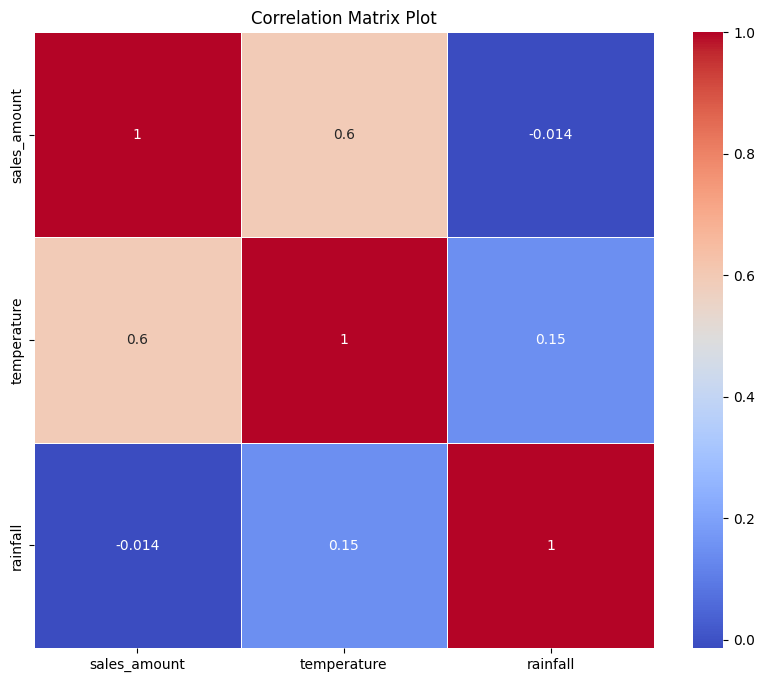

In [ ]:
# Create a correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.show()

## Get dummy variables (1/0) for the weather_condition. Because model doesn't understand the text

In [ ]:
df= pd.get_dummies(df, columns=['weather_condition'], drop_first=True)
df.head()

,date,sales_amount,temperature,rainfall,weather_condition_sunny
0,2023-01-01,86.320006,10,7,0
1,2023-01-02,194.868345,17,8,1
2,2023-01-03,196.927862,15,2,1
3,2023-01-04,69.325892,12,6,0
4,2023-01-05,45.123280,6,0,0


## Biserial Correlation Between Continus and Categorical Variable

Biserial Correlation: https://www.statology.org/correlation-between-continuous-categorical-variables/

In [ ]:
from scipy import stats
correlation, p_value = stats.pointbiserialr(df['sales_amount'], df['weather_condition_sunny'])

In [ ]:
correlation, p_value

(0.9038109438185752, 1.3504179636882083e-31)

## Visual Inspection: Analyse the relationship between TEMPERATURE and SALES colored by WEATHER_CONDITION.

In [ ]:
sunny_df= df[['temperature','sales_amount']][df['weather_condition_sunny']==1 ]
not_sunny_df = df[['temperature','sales_amount']][df['weather_condition_sunny']== 0 ]

In [ ]:
not_sunny_df

,temperature,sales_amount
0,10,86.320006
3,12,69.325892
4,6,45.123280
6,5,53.117556
7,8,63.596826
...,...,...
78,4,88.536862
79,16,77.318851
80,1,77.376518
81,12,76.940291


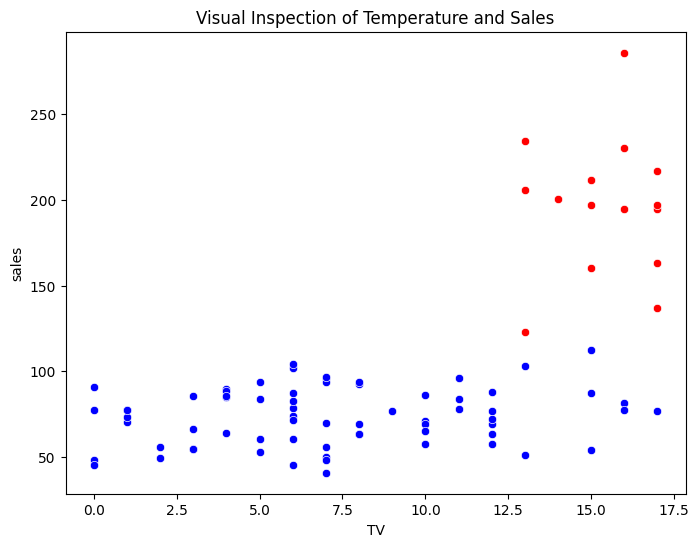

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='sales_amount', color='red',data=sunny_df)
sns.scatterplot(x='temperature', y='sales_amount', color='blue',data=not_sunny_df)
plt.title('Visual Inspection of Temperature and Sales')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

## Modeling

### Split into train and test. Train will have the columns

In [ ]:
#!pip install sklearn
#!pip insall statsmodels

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df3' is your DataFrame
X = df.drop(['sales_amount','date'], axis=1)  # Exogenous/Independent/predictors variables
y = df['sales_amount']  # Dependent variable

# Split the data into a training set and a test set (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain your training data, and X_test and y_test contain your test data.

In [ ]:
print(len(X_train), len(y_train),len(X_test),len(y_test) )

66 66 17 17


In [ ]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           sales_amount   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              191.1
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                    1.41e-31
Time:                        10:29:45   Log-Likelihood:                         -327.81
No. Observations:                  66   AIC:                                      661.6
Df Residuals:                      63   BIC:                                      668.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------